<a href="https://colab.research.google.com/github/archie46/Computer-Vision-Labarotary/blob/main/CV6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!wget -O flower.jpg "https://upload.wikimedia.org/wikipedia/commons/5/52/Liliumbulbiferumflowertop.jpg"

--2023-10-18 03:32:25--  https://upload.wikimedia.org/wikipedia/commons/5/52/Liliumbulbiferumflowertop.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 364622 (356K) [image/jpeg]
Saving to: ‘flower.jpg’

flower.jpg          100%[===================>] 356.08K  --.-KB/s    in 0.06s   

2023-10-18 03:32:25 (6.31 MB/s) - ‘flower.jpg’ saved [364622/364622]



In [ ]:
img = cv2.imread("flower.jpg",cv2.IMREAD_GRAYSCALE)

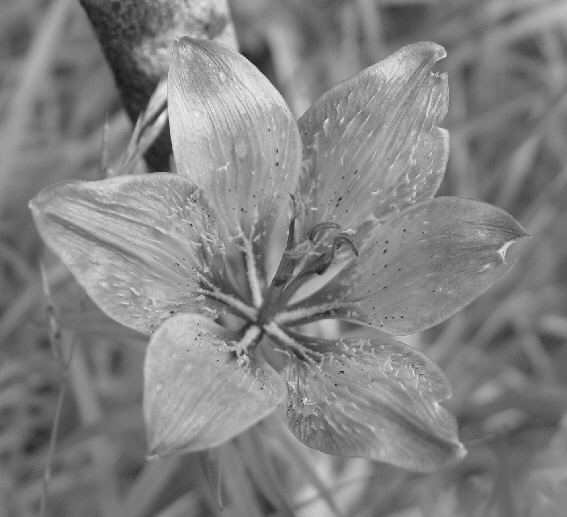

In [ ]:
cv2_imshow(img)

In [ ]:
sift = cv2.SIFT_create()

In [ ]:
keypoints,descriptors = sift.detectAndCompute(img,None)

In [ ]:
output = cv2.drawKeypoints(np.array(img),keypoints,img)

In [ ]:
print(f"Number Of Keypoints Detected: {len(keypoints)}")

Number Of Keypoints Detected: 851


In [ ]:
with open('descriptors.txt','w') as f:
  for descriptor in descriptors:
    descriptor_str = ''.join(map(str,descriptor))
    f.write(descriptor_str+'\n')

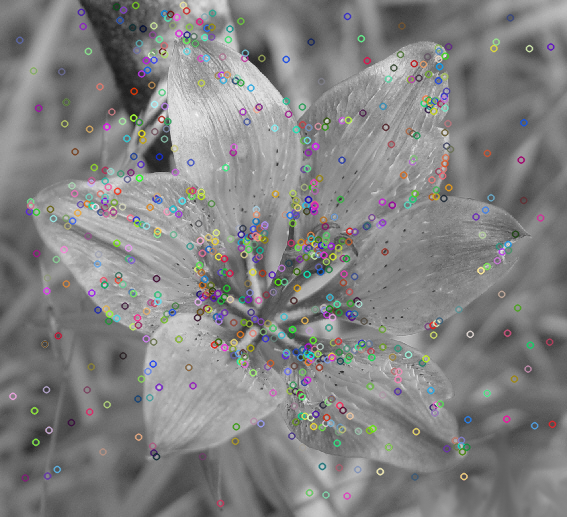

In [ ]:
cv2_imshow(output)

In [ ]:
!wget -O dog.jpg "https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg"

!wget -O cat.jpg "https://cdn.theatlantic.com/thumbor/viW9N1IQLbCrJ0HMtPRvXPXShkU=/0x131:2555x1568/976x549/media/img/mt/2017/06/shutterstock_319985324/original.jpg"

--2023-10-18 03:32:26--  https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 99.84.252.95, 99.84.252.14, 99.84.252.26, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|99.84.252.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344524 (336K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>] 336.45K  --.-KB/s    in 0.1s    

2023-10-18 03:32:26 (2.62 MB/s) - ‘dog.jpg’ saved [344524/344524]

--2023-10-18 03:32:26--  https://cdn.theatlantic.com/thumbor/viW9N1IQLbCrJ0HMtPRvXPXShkU=/0x131:2555x1568/976x549/media/img/mt/2017/06/shutterstock_319985324/original.jpg
Resolving cdn.theatlantic.com (cdn.theatlantic.com)... 199.232.194.133, 199.232.198.133
Connecting to cdn.theatlantic.com (cdn.theatlantic.com)|199.232.194.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83005 (81K) [image/jpeg]
Saving to: ‘cat.jpg’

cat

In [ ]:
img1 = cv2.imread("dog.jpg",cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("cat.jpg",cv2.IMREAD_GRAYSCALE)

In [ ]:
sift = cv2.SIFT_create()

In [ ]:
keypoints1,descriptors1 = sift.detectAndCompute(img1,None)
keypoints2,descriptors2 = sift.detectAndCompute(img2,None)

In [ ]:
bf = cv2.BFMatcher()

In [ ]:
# Match the descriptors
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

In [ ]:
# Apply ratio test to obtain good matches
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)

In [ ]:
good_matches = sorted(good_matches,key=lambda x:x.distance)

In [ ]:
# Get the matched keypoints
matched_keypoints1 = np.array([keypoints1[m.queryIdx].pt for m in good_matches]).astype(np.float32)
matched_keypoints2 = np.array([keypoints2[m.trainIdx].pt for m in good_matches]).astype(np.float32)

In [ ]:
# Find the homography matrix
H, _ = cv2.findHomography(matched_keypoints1, matched_keypoints2, cv2.RANSAC, 5.0)

panaroma = cv2.warpPerspective(img1, H, (img1.shape[1]+img2.shape[1], img1.shape[0]))

panaroma[:img2.shape[0],:img2.shape[1]] = img2


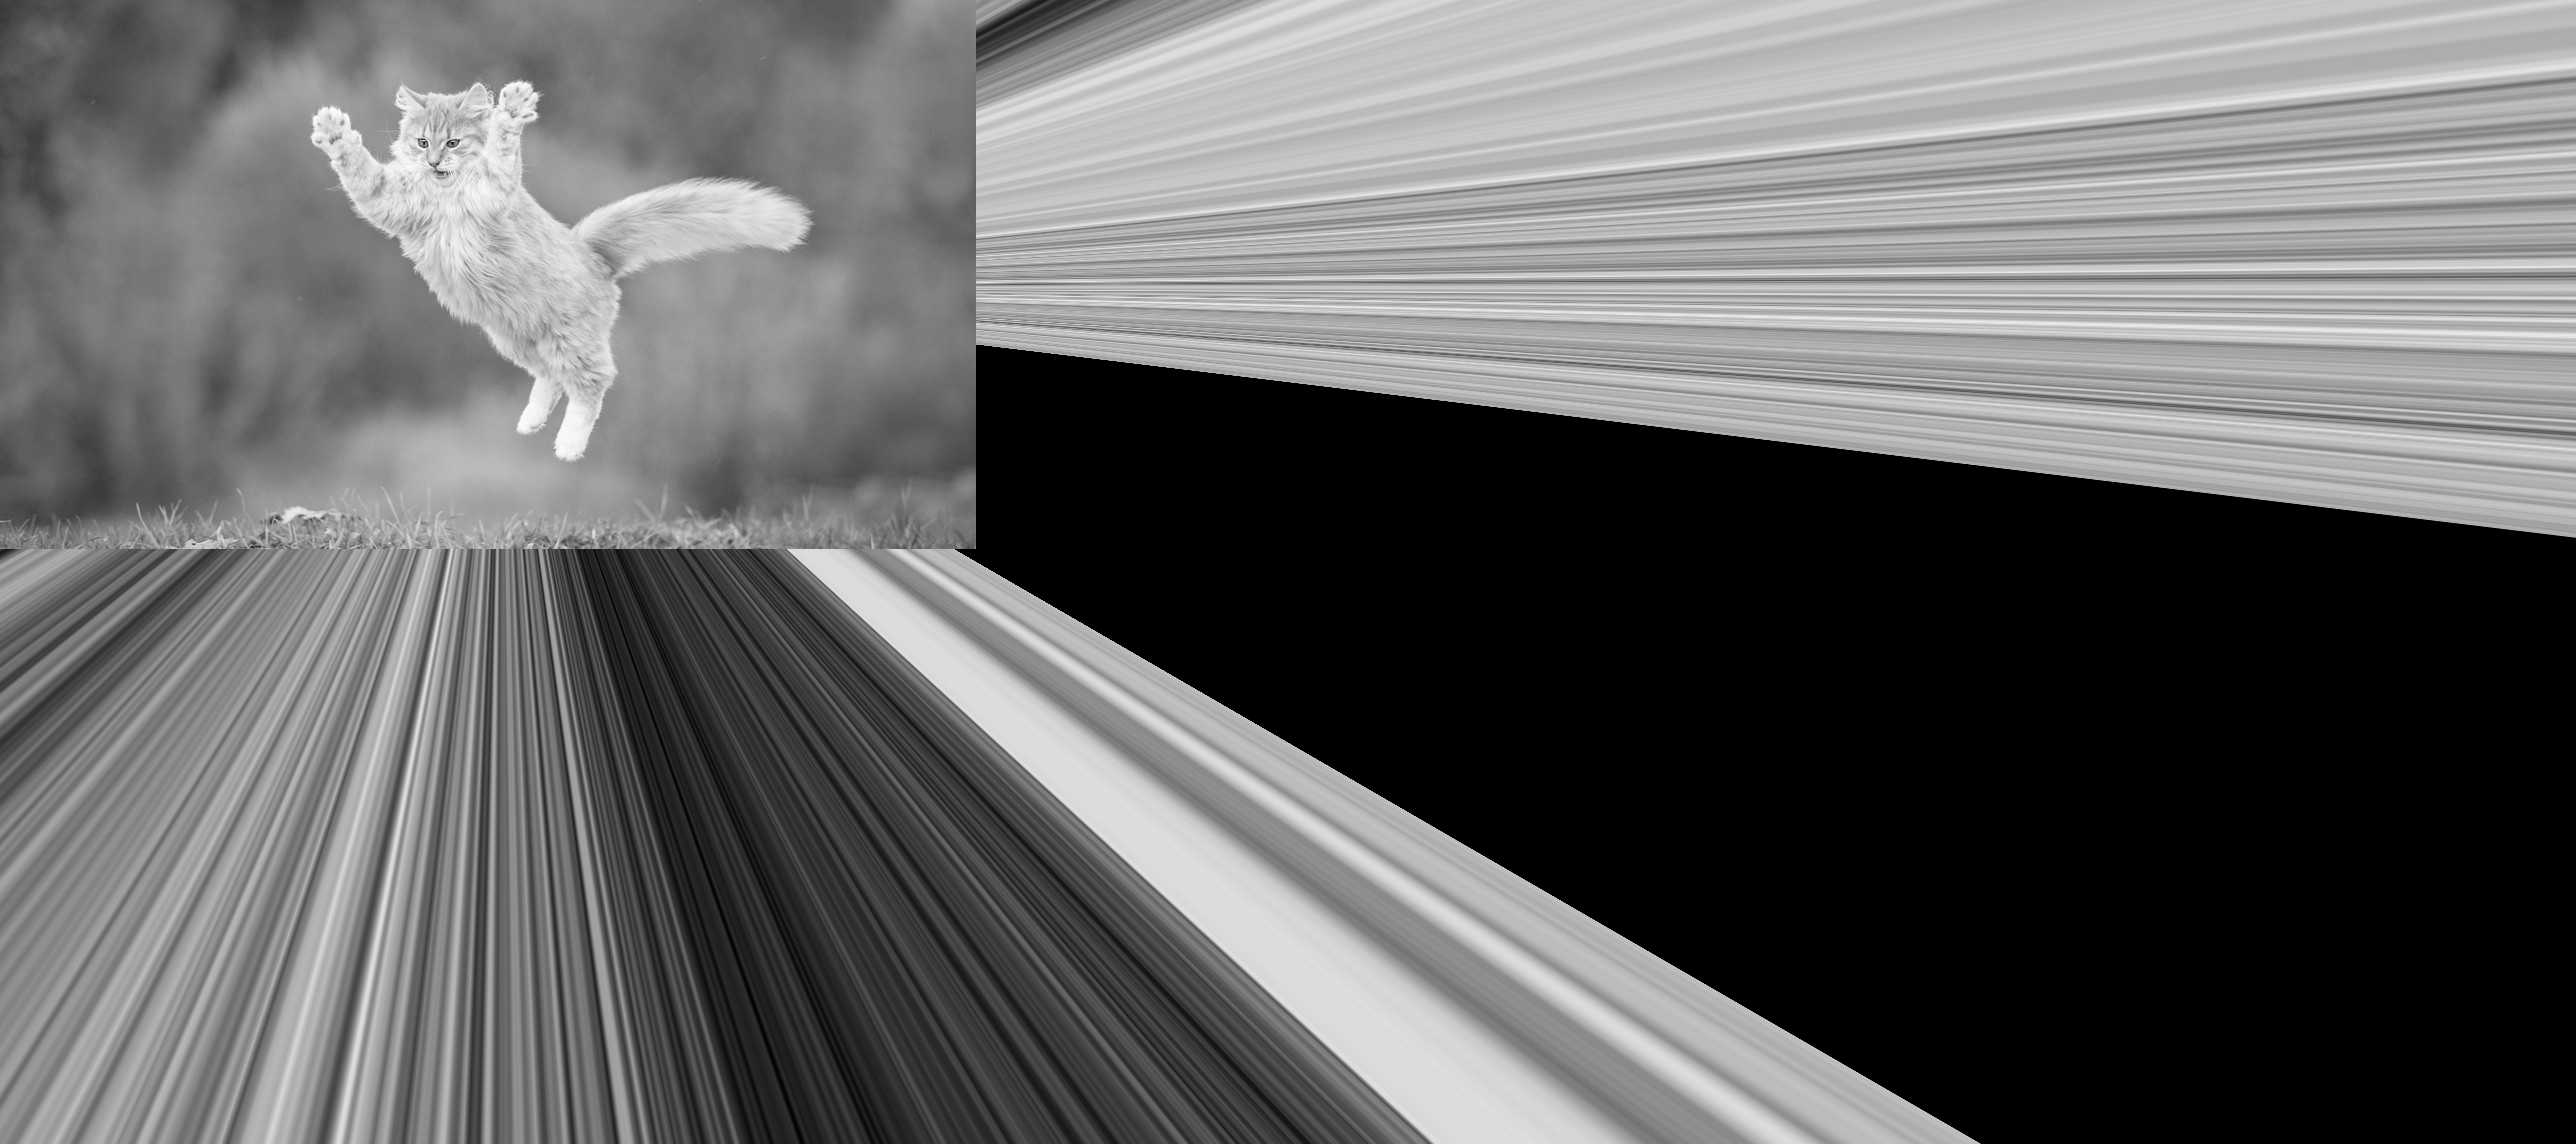

In [ ]:
cv2_imshow(panaroma)

In [ ]:
# Create an HOG descriptor object
hog = cv2.HOGDescriptor()

# Compute HOG features
hog_features = hog.compute(img)


# Print the number of HOG features
print(f"Number of HOG features: {len(hog_features)}")

Number of HOG features: 11668860


In [ ]:
!wget -O pedestrian.jpg "https://upload.wikimedia.org/wikipedia/commons/1/10/Bauman_Street.jpg"

--2023-10-18 03:32:29--  https://upload.wikimedia.org/wikipedia/commons/1/10/Bauman_Street.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148733 (145K) [image/jpeg]
Saving to: ‘pedestrian.jpg’

pedestrian.jpg      100%[===================>] 145.25K  --.-KB/s    in 0.03s   

2023-10-18 03:32:29 (4.06 MB/s) - ‘pedestrian.jpg’ saved [148733/148733]



Number Of Pedestrians : 9


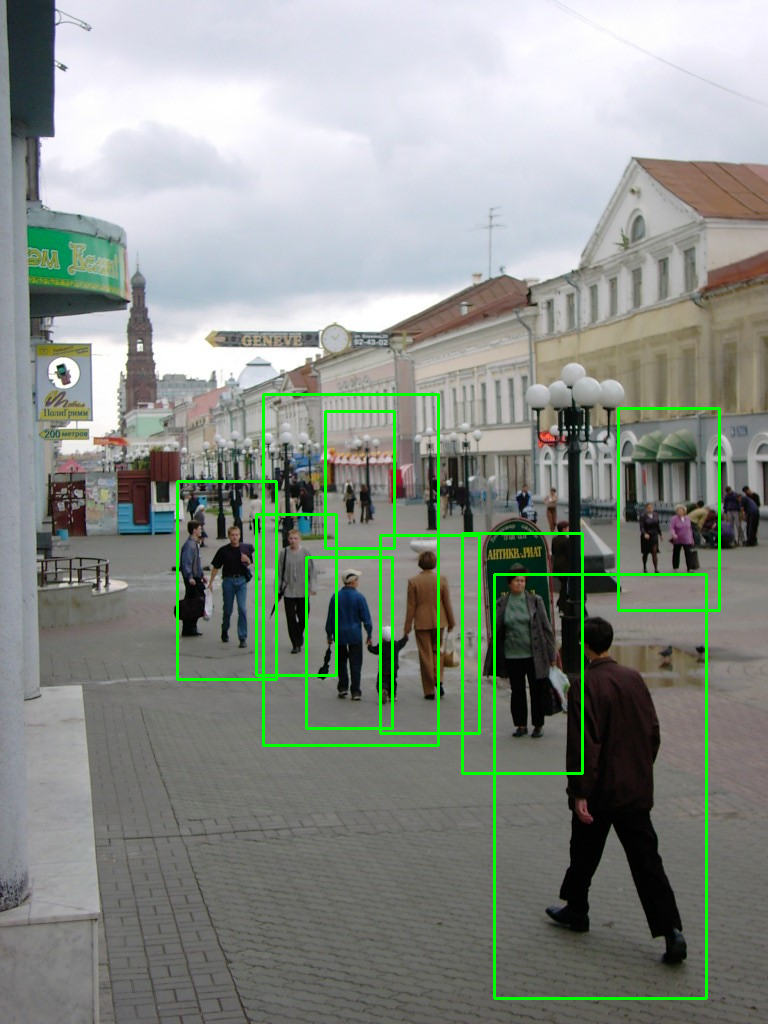

In [ ]:
# Load the pedestrian HOG detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Load the image
image_path = 'pedestrian.jpg'  # Replace with the path to your image
image = cv2.imread(image_path)

# Perform pedestrian detection
found_pedestrians, _ = hog.detectMultiScale(image)

print("Number Of Pedestrians :",len(found_pedestrians))
# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in found_pedestrians:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with pedestrian detections
cv2_imshow(image)